In [1]:
# modules we need

import numpy as np  
import matplotlib.pyplot as plt  
import h5py

# Load h5py file
ds = h5py.File("training.h5", "r")
# see what is inside that h5 file
print(ds.keys())

<KeysViewHDF5 ['organ', 'x', 'y']>


In [2]:
y = ds['y']
x = ds['x']
organ = ds['organ']

In [3]:
print(x.shape)

(20000, 299, 299, 3)


In [4]:
print(y.shape)

(20000,)


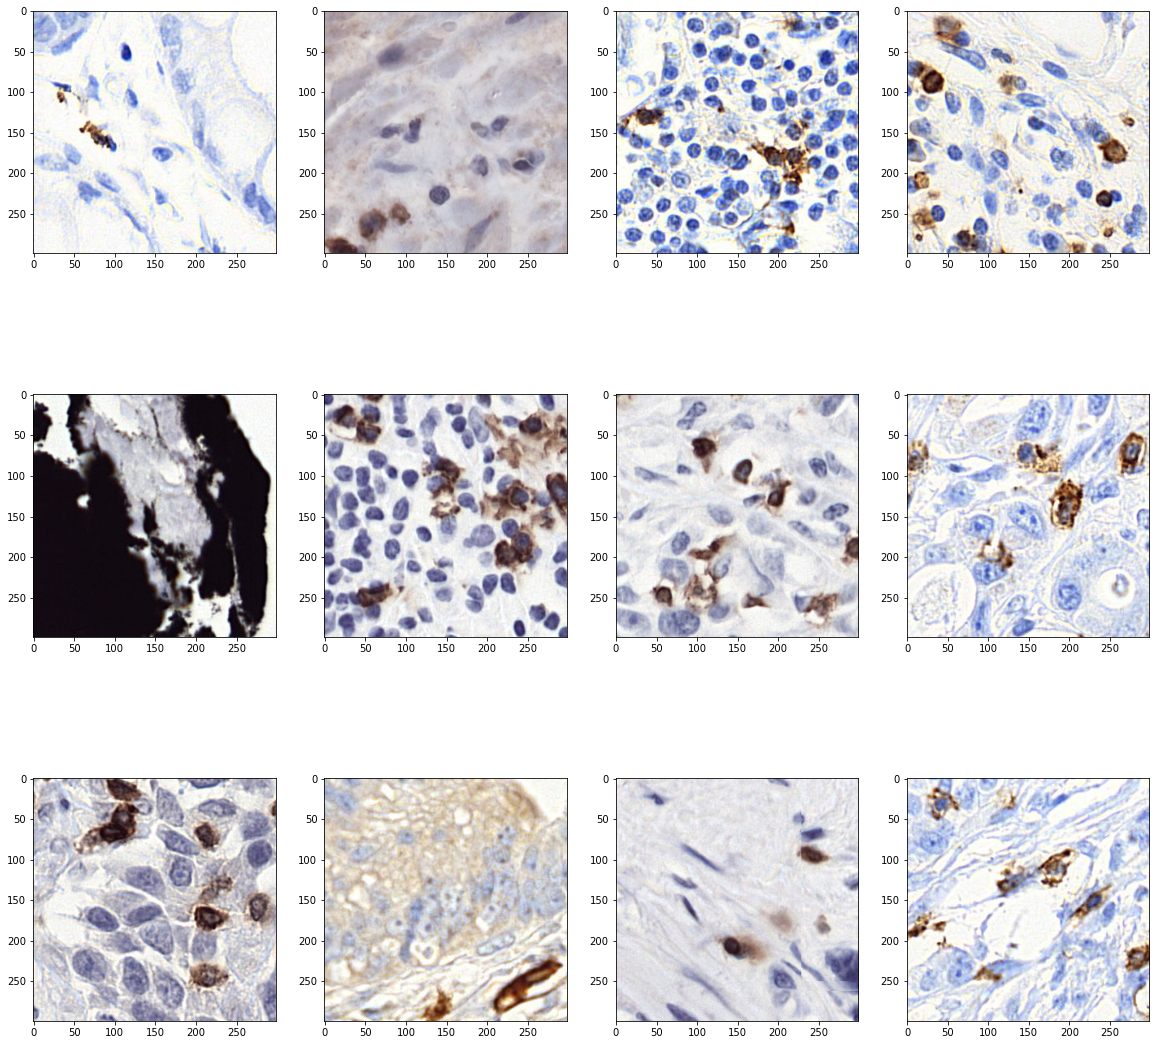

In [5]:
plt.subplots(3,4,figsize = (20,20))

for i in range(12):
    img_np = x[i]
    plt.subplot(3,4,1+i)
    plt.imshow(img_np)
plt.show()

In [6]:
import numpy as np
from PIL import Image

# Select the first 500 images from the dataset
selected_images = x[:500]

# Iterate through the selected images
for i, img in enumerate(selected_images):
    # Crop the image to remove the 16 pixel border
    img = img[16:-16, 16:-16]
    img = Image.fromarray(img)
    img.save("image_{}.png".format(i))


In [7]:
import pandas as pd

# Create a dataframe from the labels y
data = {'Label': y}
df = pd.DataFrame(data)

# Select the first 100 rows of the dataframe
df = df.head(500)

# Save the dataframe to a CSV file
df.to_csv('labels.csv', index=False)
